Bibliotecas e imagens que serão usadas no projeto:

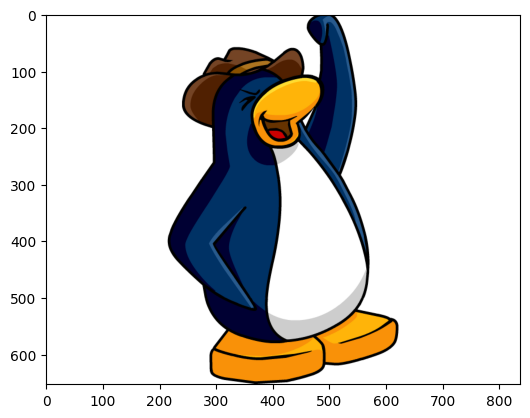

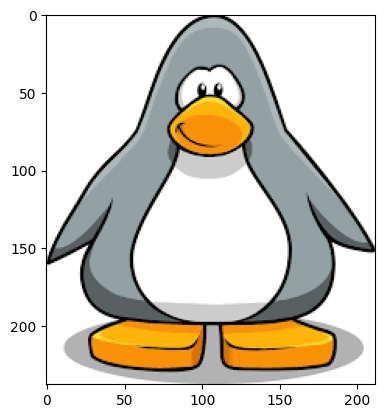

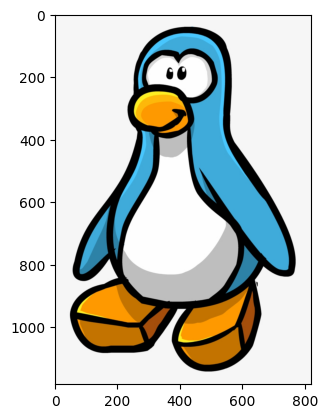

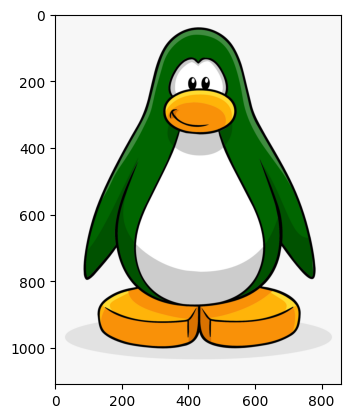

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

p1 = np.array(Image.open('P1.png'))[:, :, :3]
# Convertendo a imagem para RGB
p2 = np.array(Image.open('P2.png').convert('RGB'))[:, :, :3]
p3 = np.array(Image.open('P3.jpg'))[:, :, :3]
p4 = np.array(Image.open('P4.png'))[:, :, :3]

# Teste das imagens
plt.imshow(p1)
plt.show()
plt.imshow(p2)
plt.show()
plt.imshow(p3)
plt.show()
plt.imshow(p4)
plt.show()

1. Juntando as imagens

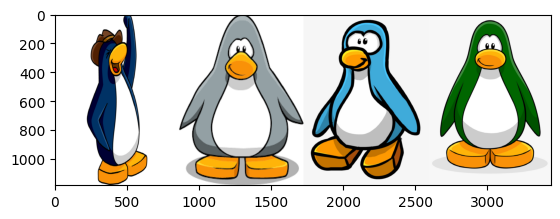

In [3]:
# Determinar o tamanho máximo das imagens
l_max = max(p1.shape[0], p2.shape[0], p3.shape[0], p4.shape[0])  # Altura
c_max = max(p1.shape[1], p2.shape[1], p3.shape[1], p4.shape[1])  # Largura

# Função para escalonamento manual de uma imagem
def escalar_imagem(img, l_max, c_max):
    ls, cs, p = l_max, c_max, img.shape[2]  # Definir tamanho da imagem redimensionada
    img_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)  # Matriz de saída

    # Preenchendo a nova imagem redimensionada
    for i in range(ls):
        for j in range(cs):
            new_y = int(np.floor(i * (img.shape[0] / ls)))  # Escala da altura
            new_x = int(np.floor(j * (img.shape[1] / cs)))  # Escala da largura
            img_nn[i, j] = img[new_y, new_x]  # Copiar o valor da imagem original
    
    return img_nn
# Escalar todas as imagens para o tamanho máximo
p1_scaled = escalar_imagem(p1, l_max, c_max)
p2_scaled = escalar_imagem(p2, l_max, c_max)
p3_scaled = escalar_imagem(p3, l_max, c_max)
p4_scaled = escalar_imagem(p4, l_max, c_max)

# Juntar as imagens lado a lado
imagem_junta = np.zeros((l_max, c_max * 4, 3), dtype=np.uint8)  # Nova imagem com 4 partes

# Colocando as imagens redimensionadas lado a lado
imagem_junta[:, :c_max] = p1_scaled
imagem_junta[:, c_max:2*c_max] = p2_scaled
imagem_junta[:, 2*c_max:3*c_max] = p3_scaled
imagem_junta[:, 3*c_max:] = p4_scaled

plt.imshow(imagem_junta)
plt.show()

2. Alterando a cor dos pinguins

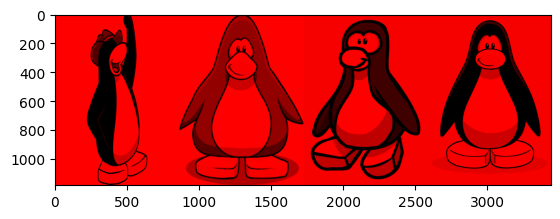

In [4]:
# Alterar as cores para vermelho (zerando os canais G e B)
imagem_junta[:, :, 1] = 0  # Zera o canal verde
imagem_junta[:, :, 2] = 0  # Zera o canal azul

# Exibir a imagem com as cores alteradas para vermelho
plt.imshow(imagem_junta)
plt.show()

3. Imagem refletida

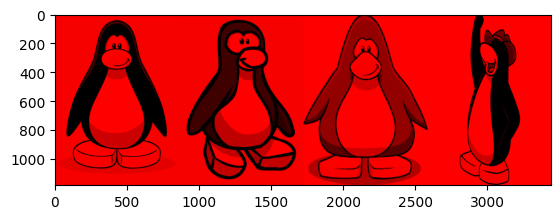

In [5]:
imagem_reflt = np.zeros(shape=imagem_junta.shape, dtype=np.uint8)
# Acesso a índices: começo:fim:passo
# Logo: ::-1 significa do começo ao fim com passo -1 (de trás para frente)
imagem_reflt[::1, ::-1] = imagem_junta # ou mario[:, :]
plt.imshow(imagem_reflt)

4. Recorte do pinguim

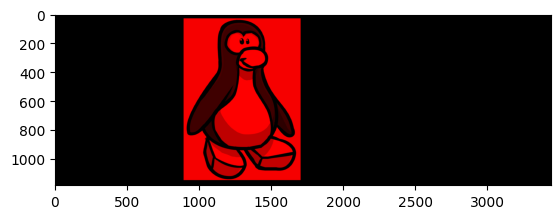

In [6]:
top, bottom = 30, 1150
left, right = 890, 1700

mask = np.zeros(shape=imagem_reflt.shape, dtype=np.uint8)
mask[top:bottom, left:right, :] = 255  # A área onde o pinguim está fica com valor 255

img_masked = imagem_reflt & mask

plt.imshow(img_masked)

5. Análise do histograma e threshold

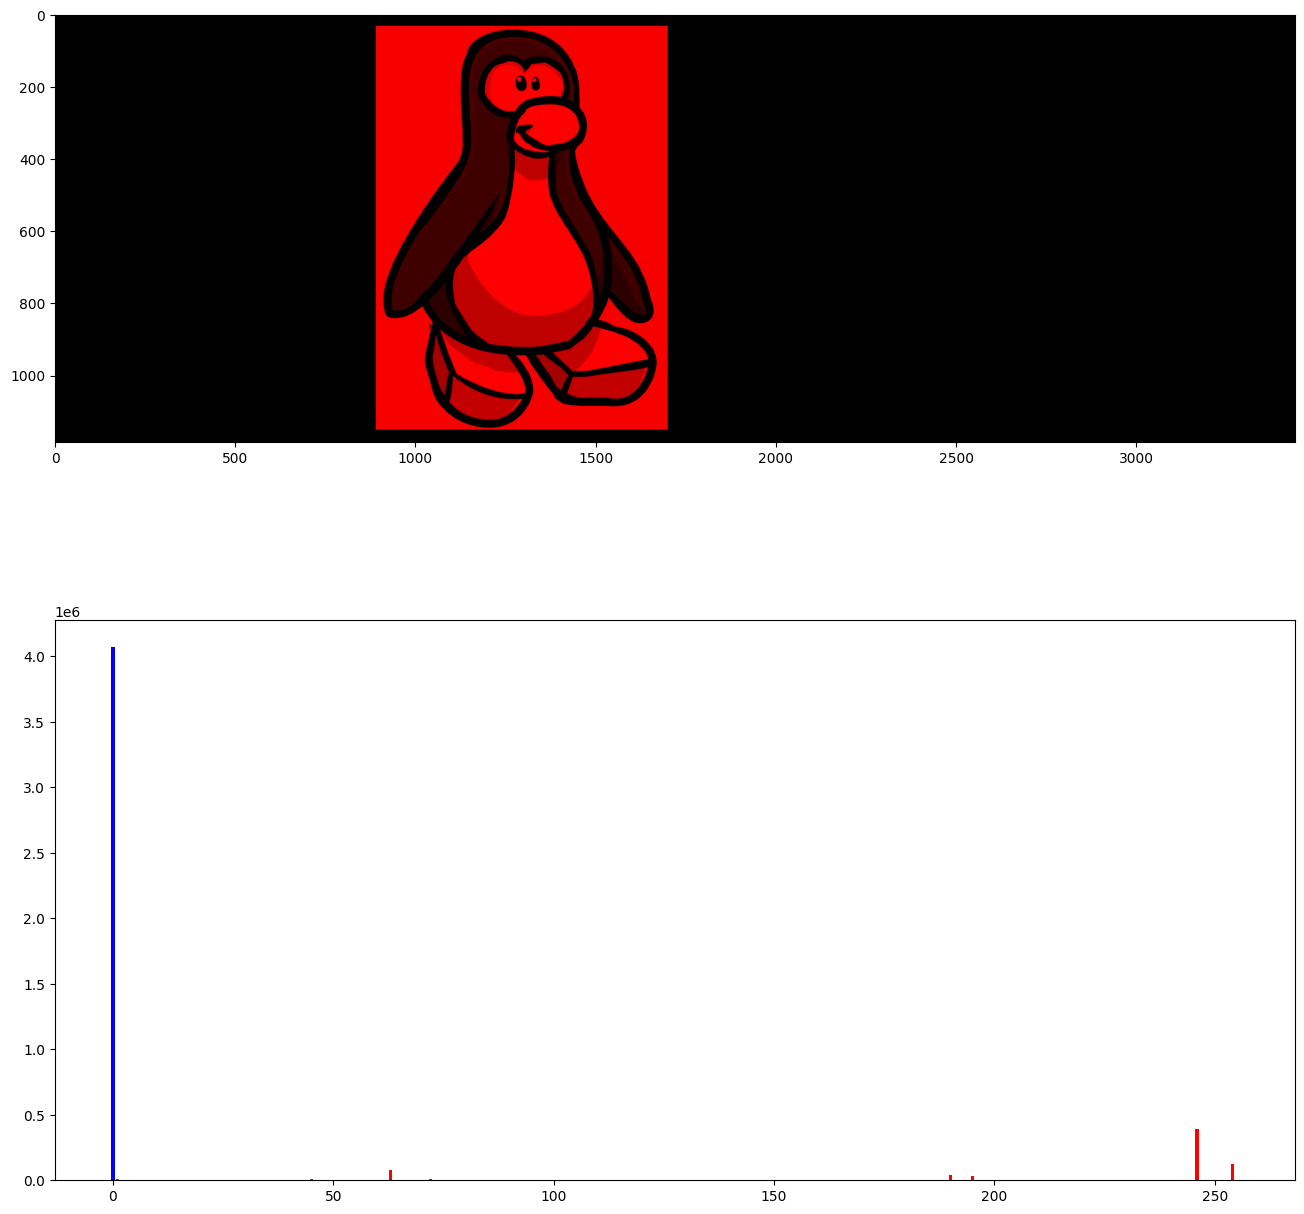

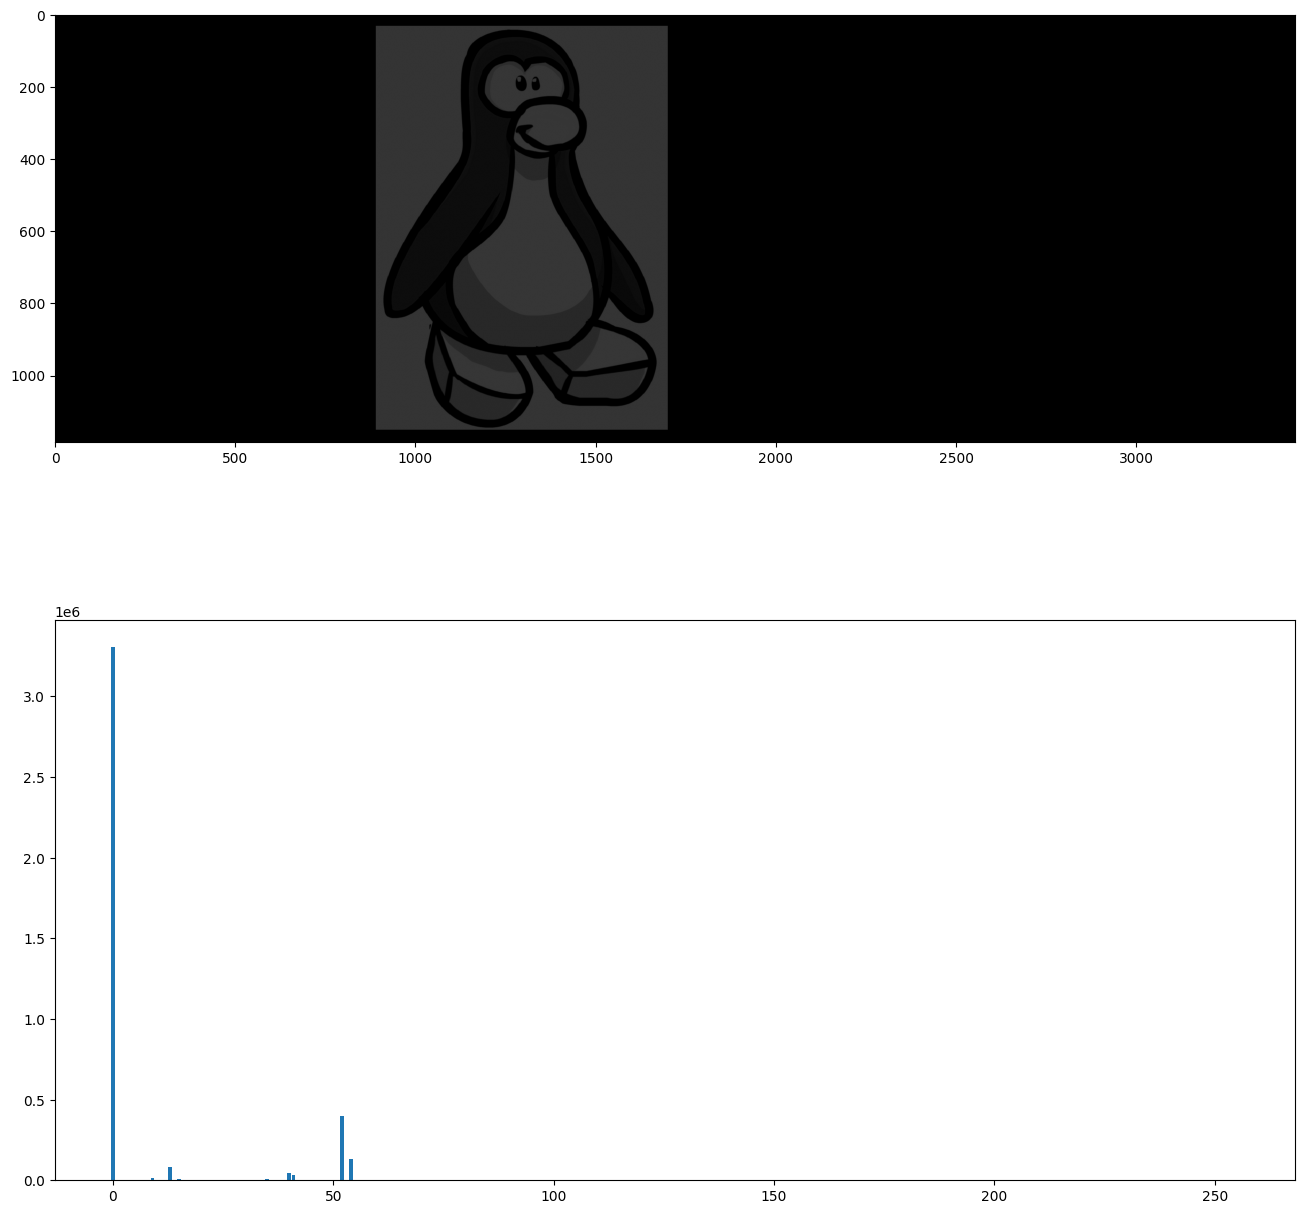

In [7]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

show_histogram(img_masked)
img_masked_gray = ((0.2126 * img_masked[:, :, 0]) + (0.7152 * img_masked[:, :, 1]) + (0.0722 * img_masked[:, :, 2])).astype(np.uint8)
show_histogram_gray(img_masked_gray)

Baseado no histograma acima, uma boa parte da imagem está concentrada na faixa de valor entre 30 e 50/55. 
Um valor razoável de threshold poderia ser 45 por exemplo. 

6. Pintando os pixels abaixo do pinguim de branco

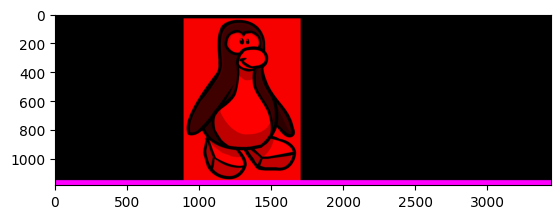

In [9]:
# Definição do limite inferior baseado no threshold
threshold = 45
bottom = 1150  # Coordenada vertical abaixo da qual queremos pintar

# Criar uma máscara para os pixels abaixo de `bottom` e que tenham valores menores que o threshold
mask = img_masked[:, :, 0] < threshold  # Baseado no canal R (pode ser ajustado)

# Aplicar apenas nos pixels abaixo da coordenada 'bottom'
mask[:bottom, :] = False  # Mantém a parte superior da imagem inalterada

# Pintar os pixels abaixo do bottom com a cor roxa (255, 0, 255)
img_masked[mask] = [255, 0, 255]

# Exibir a imagem resultante
plt.imshow(img_masked)
plt.show()